In [1]:
# Import the necessary modules
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Understanding and Cleaning the Data

In [2]:
# Read The Data
dataset = pd.read_csv("datasets/car_price.csv")
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [3]:
dataset.shape

(5512, 10)

In [6]:
dataset.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [7]:
dataset.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [8]:
dataset['car_name'].nunique()

1896

In [9]:
dataset['fuel_type'].nunique()

5

In [10]:
dataset['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Cng', 'Electric', 'Lpg'], dtype=object)

In [11]:
dataset['transmission'].nunique()

2

In [12]:
dataset['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
dataset['ownership'].nunique()

6

In [15]:
dataset['ownership'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner',
       '0th Owner'], dtype=object)

In [17]:
dataset['engine'].nunique()

139

In [18]:
dataset['Seats'].nunique()

6

In [19]:
dataset['Seats'].unique()

array(['5 Seats', '6 Seats', '7 Seats', '4 Seats', '8 Seats', '2 Seats'],
      dtype=object)

In [66]:
dataset['manufacture'].nunique()

26

In [67]:
dataset['manufacture'].unique()

array([2017, 2021, 2016, 2018, 2015, 2014, 2020, 2019, 2012, 2008, 2013,
       2022, 2010, 2005, 2009, 2006, 2011, 2007, 2002, 2004, 1998, 2003,
       1995, 2000, 2001, 1999], dtype=int64)

Label encoding for car names

In [3]:
# Initialize Label Encoder
label_encoder = LabelEncoder()

In [4]:
dataset['car_name_label_encoded'] = label_encoder.fit_transform(dataset['car_name'])
# Create a mapping between label encoded values and actual car names 
label_encoded_to_car_name =  dict(zip(dataset['car_name_label_encoded'], dataset['car_name']))
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_name_label_encoded
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,743
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1444
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1706
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,385
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,1831


In [5]:
label_encoded_to_car_name

{743: 'Jeep Compass 2.0 Longitude Option BSIV',
 1444: 'Renault Duster RXZ Turbo CVT',
 1706: 'Toyota Camry 2.5 G',
 385: 'Honda Jazz VX CVT',
 1831: 'Volkswagen Polo 1.2 MPI Highline',
 1857: 'Volkswagen Vento 1.2 TSI Highline AT',
 1858: 'Volkswagen Vento 1.2 TSI Highline Plus AT',
 396: 'Honda WR-V VX Diesel',
 346: 'Honda City i VTEC CVT SV',
 1439: 'Renault Duster Petrol RXS CVT',
 996: 'Maruti Baleno 1.2 Alpha',
 917: 'Mahindra XUV300 W6',
 727: 'Jeep Compass 1.4 Limited Plus BSIV',
 330: 'Honda City V MT',
 486: 'Hyundai Grand i10 AT Asta',
 656: 'Hyundai i20 1.4 Asta',
 1042: 'Maruti Ciaz 1.4 Delta',
 1401: 'Nissan Micra XL Optional',
 1049: 'Maruti Ciaz Alpha Automatic BSIV',
 1183: 'Maruti Swift Dzire VXI',
 1459: 'Renault KWID RXT',
 1458: 'Renault KWID RXL BSIV',
 740: 'Jeep Compass 2.0 Limited Plus BSIV',
 480: 'Hyundai Grand i10 1.2 Kappa Magna BSIV',
 981: 'Maruti Alto K10 LXI',
 577: 'Hyundai Verna 1.6 VTVT S Option',
 539: 'Hyundai Tucson GLS AT',
 1184: 'Maruti Swift 

In [27]:
len(label_encoded_to_car_name)

1896

In [5]:
# Transform a number into an actual car name
label_encoded_number = 0
restored_car_name = label_encoded_to_car_name[label_encoded_number]
restored_car_name

'Audi A3 35 TDI Premium'

Label Encoding for Fuel Type

In [5]:
dataset['fuel_type_label_encoded'] = label_encoder.fit_transform(dataset['fuel_type'])
# Create a mapping between label encoded values and actual fuel types
label_encoded_to_fuel_type = dict(zip(dataset['fuel_type_label_encoded'], dataset['fuel_type']))
label_encoded_to_fuel_type 

{1: 'Diesel', 4: 'Petrol', 0: 'Cng', 2: 'Electric', 3: 'Lpg'}

Label Encoding for Transmission

In [6]:
dataset['transmission_label_encoded'] = label_encoder.fit_transform(dataset['transmission'])
# Create a mapping between label encoded values and actual transmission values
label_encoded_to_transmission = dict(zip(dataset['transmission_label_encoded'], dataset['transmission']))
label_encoded_to_transmission

{1: 'Manual', 0: 'Automatic'}

Label Encoding for Ownership 

In [7]:
dataset['ownership_label_encoded'] = label_encoder.fit_transform(dataset['ownership'])
# Create a mapping between label encoded values and actual transmission values
label_encoded_to_ownership = dict(zip(dataset['ownership_label_encoded'], dataset['ownership']))
label_encoded_to_ownership

{1: '1st Owner',
 2: '2nd Owner',
 3: '3rd Owner',
 4: '4th Owner',
 5: '5th Owner',
 0: '0th Owner'}

Label Encoding for Engine

In [8]:
dataset['engine_label_encoded'] = label_encoder.fit_transform(dataset['engine'])
# Create a mapping between label encoded values and actual engine values
label_encoded_to_engine = dict(zip(dataset['engine_label_encoded'], dataset['engine']))
label_encoded_to_engine

{60: '1956 cc',
 19: '1330 cc',
 88: '2494 cc',
 14: '1199 cc',
 12: '1197 cc',
 41: '1498 cc',
 40: '1497 cc',
 24: '1368 cc',
 29: '1396 cc',
 25: '1373 cc',
 13: '1198 cc',
 36: '1462 cc',
 131: '799 cc',
 137: '998 cc',
 47: '1591 cc',
 71: '1999 cc',
 138: '999 cc',
 132: '814 cc',
 130: '796 cc',
 22: '1353 cc',
 34: '1451 cc',
 67: '1995 cc',
 65: '1991 cc',
 74: '2179 cc',
 56: '1798 cc',
 64: '1985 cc',
 61: '1968 cc',
 108: '2993 cc',
 121: '4134 cc',
 50: '1598 cc',
 134: '936 cc',
 16: '1248 cc',
 72: '2143 cc',
 3: '1086 cc',
 70: '1998 cc',
 77: '2198 cc',
 91: '2499 cc',
 39: '1496 cc',
 8: '1186 cc',
 44: '1582 cc',
 63: '1984 cc',
 69: '1997 cc',
 62: '1969 cc',
 37: '1493 cc',
 98: '2755 cc',
 11: '1196 cc',
 102: '2953 cc',
 75: '2184 cc',
 35: '1461 cc',
 107: '2987 cc',
 59: '1950 cc',
 28: '1395 cc',
 92: '2523 cc',
 9: '1193 cc',
 2: '1061 cc',
 17: '1298 cc',
 45: '1586 cc',
 135: '993 cc',
 79: '2354 cc',
 32: '1405 cc',
 104: '2967 cc',
 0: '0 cc',
 95: '2694 

Label Encoding for Seats

In [9]:
dataset['seats_label_encoded'] = label_encoder.fit_transform(dataset['Seats'])
# Create a mapping between label encoded values and actual seats values
label_encoded_to_seats = dict(zip(dataset['seats_label_encoded'], dataset['Seats']))
label_encoded_to_seats

{2: '5 Seats',
 3: '6 Seats',
 4: '7 Seats',
 1: '4 Seats',
 5: '8 Seats',
 0: '2 Seats'}

Clean Car Prices Values and Transform them to $

In [10]:
# Remove "Lakh" and "Crore" from the price column
def convert_price_to_float(price_str):
    if 'Lakh' in price_str:
        return float(price_str.replace(',', '').replace(' Lakh', '')) * 100000
    elif 'Crore' in price_str:
        return float(price_str.replace(',', '').replace(' Crore', '')) * 10000000
    else:
        return float(price_str.replace(',', ''))
dataset['car_prices_in_rupee'] = dataset['car_prices_in_rupee'].apply(convert_price_to_float)

In [12]:
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_name_label_encoded,fuel_type_label_encoded,transmission_label_encoded,ownership_label_encoded,engine_label_encoded,seats_label_encoded
0,0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,743,1,1,1,60,2
1,1,Renault Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1444,4,0,1,19,2
2,2,Toyota Camry 2.5 G,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1706,4,0,1,88,2
3,3,Honda Jazz VX CVT,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,385,4,0,1,14,2
4,4,Volkswagen Polo 1.2 MPI Highline,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,1831,4,1,1,14,2


In [11]:
# Convert car prices to $
# Exchange rate indian rupee to us dollar
exchange_rate = 0.012
dataset['car_prices_in_dollar'] = dataset['car_prices_in_rupee'] * exchange_rate

In [12]:
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_name_label_encoded,fuel_type_label_encoded,transmission_label_encoded,ownership_label_encoded,engine_label_encoded,seats_label_encoded,car_prices_in_dollar
0,0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,743,1,1,1,60,2,12036.0
1,1,Renault Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1444,4,0,1,19,2,15396.0
2,2,Toyota Camry 2.5 G,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1706,4,0,1,88,2,19680.0
3,3,Honda Jazz VX CVT,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,385,4,0,1,14,2,9324.0
4,4,Volkswagen Polo 1.2 MPI Highline,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,1831,4,1,1,14,2,6180.0


In [12]:
# Represent car prices in USD values in Thousands
dataset['car_prices_in_dollar_k'] = dataset['car_prices_in_dollar'] / 1000
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_name_label_encoded,fuel_type_label_encoded,transmission_label_encoded,ownership_label_encoded,engine_label_encoded,seats_label_encoded,car_prices_in_dollar,car_prices_in_dollar_k
0,0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,743,1,1,1,60,2,12036.0,12.036
1,1,Renault Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1444,4,0,1,19,2,15396.0,15.396
2,2,Toyota Camry 2.5 G,1640000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1706,4,0,1,88,2,19680.0,19.680
3,3,Honda Jazz VX CVT,777000.0,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,385,4,0,1,14,2,9324.0,9.324
4,4,Volkswagen Polo 1.2 MPI Highline,515000.0,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,1831,4,1,1,14,2,6180.0,6.180


Clean the kms_driven column

In [13]:
dataset['kms_driven'] = dataset['kms_driven'].str.replace(' kms', '')
dataset['kms_driven'] = dataset['kms_driven'].str.replace(',','').astype(float)

In [14]:
dataset['kms_driven'] = dataset['kms_driven'] / 1000
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_name_label_encoded,fuel_type_label_encoded,transmission_label_encoded,ownership_label_encoded,engine_label_encoded,seats_label_encoded,car_prices_in_dollar,car_prices_in_dollar_k
0,0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86.226,Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,743,1,1,1,60,2,12036.0,12.036
1,1,Renault Duster RXZ Turbo CVT,1283000.0,13.248,Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1444,4,0,1,19,2,15396.0,15.396
2,2,Toyota Camry 2.5 G,1640000.0,60.343,Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1706,4,0,1,88,2,19680.0,19.680
3,3,Honda Jazz VX CVT,777000.0,26.696,Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,385,4,0,1,14,2,9324.0,9.324
4,4,Volkswagen Polo 1.2 MPI Highline,515000.0,69.414,Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,1831,4,1,1,14,2,6180.0,6.180


Label encoding for year of manufacture

In [15]:
dataset['year_label_encoded'] = label_encoder.fit_transform(dataset['manufacture'])
# Create a mapping between label encoded values and actual year of manufacture values
label_encoded_to_year = dict(zip(dataset['year_label_encoded'], dataset['manufacture']))
label_encoded_to_year

{20: 2017,
 24: 2021,
 19: 2016,
 21: 2018,
 18: 2015,
 17: 2014,
 23: 2020,
 22: 2019,
 15: 2012,
 11: 2008,
 16: 2013,
 25: 2022,
 13: 2010,
 8: 2005,
 12: 2009,
 9: 2006,
 14: 2011,
 10: 2007,
 5: 2002,
 7: 2004,
 1: 1998,
 6: 2003,
 0: 1995,
 3: 2000,
 4: 2001,
 2: 1999}

## Dataset after preprocessing

Create a new dataset from cleand and preprocessed dataset

In [16]:
selected_columns = {
    'car_name_label_encoded': 'car_name',
    'year_label_encoded' : 'year_manufacture',
    'fuel_type_label_encoded' : 'fuel_type',
    'transmission_label_encoded' : 'transmission',
    'ownership_label_encoded' : 'ownership',
    'engine_label_encoded': 'engine',
    'seats_label_encoded' : 'number_seats',
    'kms_driven' : 'kms_driven',
    'car_prices_in_dollar_k': 'car_price'
}

new_dataset = dataset[list(selected_columns.keys())].rename(columns=selected_columns)

# Saving the new dataset
new_dataset.to_csv('datasets/car_price_cleaned.csv', index_label='index')

In [17]:
dataset = pd.read_csv('datasets/car_price_cleaned.csv')
dataset.head()

,index,car_name,year_manufacture,fuel_type,transmission,ownership,engine,number_seats,kms_driven,car_price
0,0,743,20,1,1,1,60,2,86.226,12.036
1,1,1444,24,4,0,1,19,2,13.248,15.396
2,2,1706,19,4,0,1,88,2,60.343,19.680
3,3,385,21,4,0,1,14,2,26.696,9.324
4,4,1831,19,4,1,1,14,2,69.414,6.180


In [81]:
dataset.describe()

,index,car_name,year_manufacture,fuel_type,transmission,ownership,engine,number_seats,kms_driven,car_price
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,2755.500000,916.880443,18.455914,2.613026,0.718795,1.421807,53.225327,2.251633,63.211888,13.950116
std,1591.321673,516.405197,3.926176,1.510117,0.449628,0.703092,42.440809,0.716600,41.844131,23.639027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.420000
25%,1377.750000,481.750000,16.000000,1.000000,0.000000,1.000000,14.000000,2.000000,33.151750,3.780000
50%,2755.500000,970.500000,19.000000,4.000000,1.000000,1.000000,41.000000,2.000000,59.000000,6.600000
75%,4133.250000,1298.000000,21.000000,4.000000,1.000000,2.000000,74.000000,2.000000,84.265250,12.309000
max,5511.000000,1895.000000,25.000000,4.000000,1.000000,5.000000,138.000000,5.000000,560.000000,230.400000


In [82]:
dataset.corr()

,index,car_name,year_manufacture,fuel_type,transmission,ownership,engine,number_seats,kms_driven,car_price
index,1.000000,0.032137,-0.040199,-0.019118,0.114820,0.073069,-0.004352,-0.016845,0.105304,-0.033451
car_name,0.032137,1.000000,0.024066,-0.084881,0.050843,-0.001258,0.007186,0.011826,0.059413,0.006805
year_manufacture,-0.040199,0.024066,1.000000,-0.033529,-0.257212,-0.428123,0.003861,0.009135,-0.479393,0.351879
fuel_type,-0.019118,-0.084881,-0.033529,1.000000,0.104008,-0.054567,-0.034301,-0.061080,-0.276091,-0.149550
transmission,0.114820,0.050843,-0.257212,0.104008,1.000000,0.084836,-0.053324,0.009028,0.211246,-0.532867
ownership,0.073069,-0.001258,-0.428123,-0.054567,0.084836,1.000000,0.016492,-0.002538,0.283716,-0.159079
engine,-0.004352,0.007186,0.003861,-0.034301,-0.053324,0.016492,1.000000,0.055365,0.013568,0.059362
number_seats,-0.016845,0.011826,0.009135,-0.061080,0.009028,-0.002538,0.055365,1.000000,0.017828,0.006243
kms_driven,0.105304,0.059413,-0.479393,-0.276091,0.211246,0.283716,0.013568,0.017828,1.000000,-0.242475
car_price,-0.033451,0.006805,0.351879,-0.149550,-0.532867,-0.159079,0.059362,0.006243,-0.242475,1.000000


## Visualizing Data

In [84]:
# Adding some styles to plots
sns.set_style("dark")
# Set the color palette
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500", "#606c38", "#283618", "#fefae0", "#dda15e", 
"#bc6c25", "#d62828", "#fb6f92", "#ffb3c6", "#006d77", "#edf2f4", "#8d99ae", "#7209b7", "#fcf6bd", "#d0f4de", "#ff99c8",
'#008bf8', '#e9ff70', '#dc0073', '#04e762', "#f95738"]
sns.set_context("talk", font_scale=0.5, rc={"grid.linewidth":0.5})

Visualize how car prices vary based on year of manufacture

C:\Users\GMI\AppData\Local\Temp\ipykernel_17748\3002438243.py:22: UserWarning: 
The palette list has fewer values (25) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=years, y=car_price_per_year, hue=car_price_per_year, palette=colors)


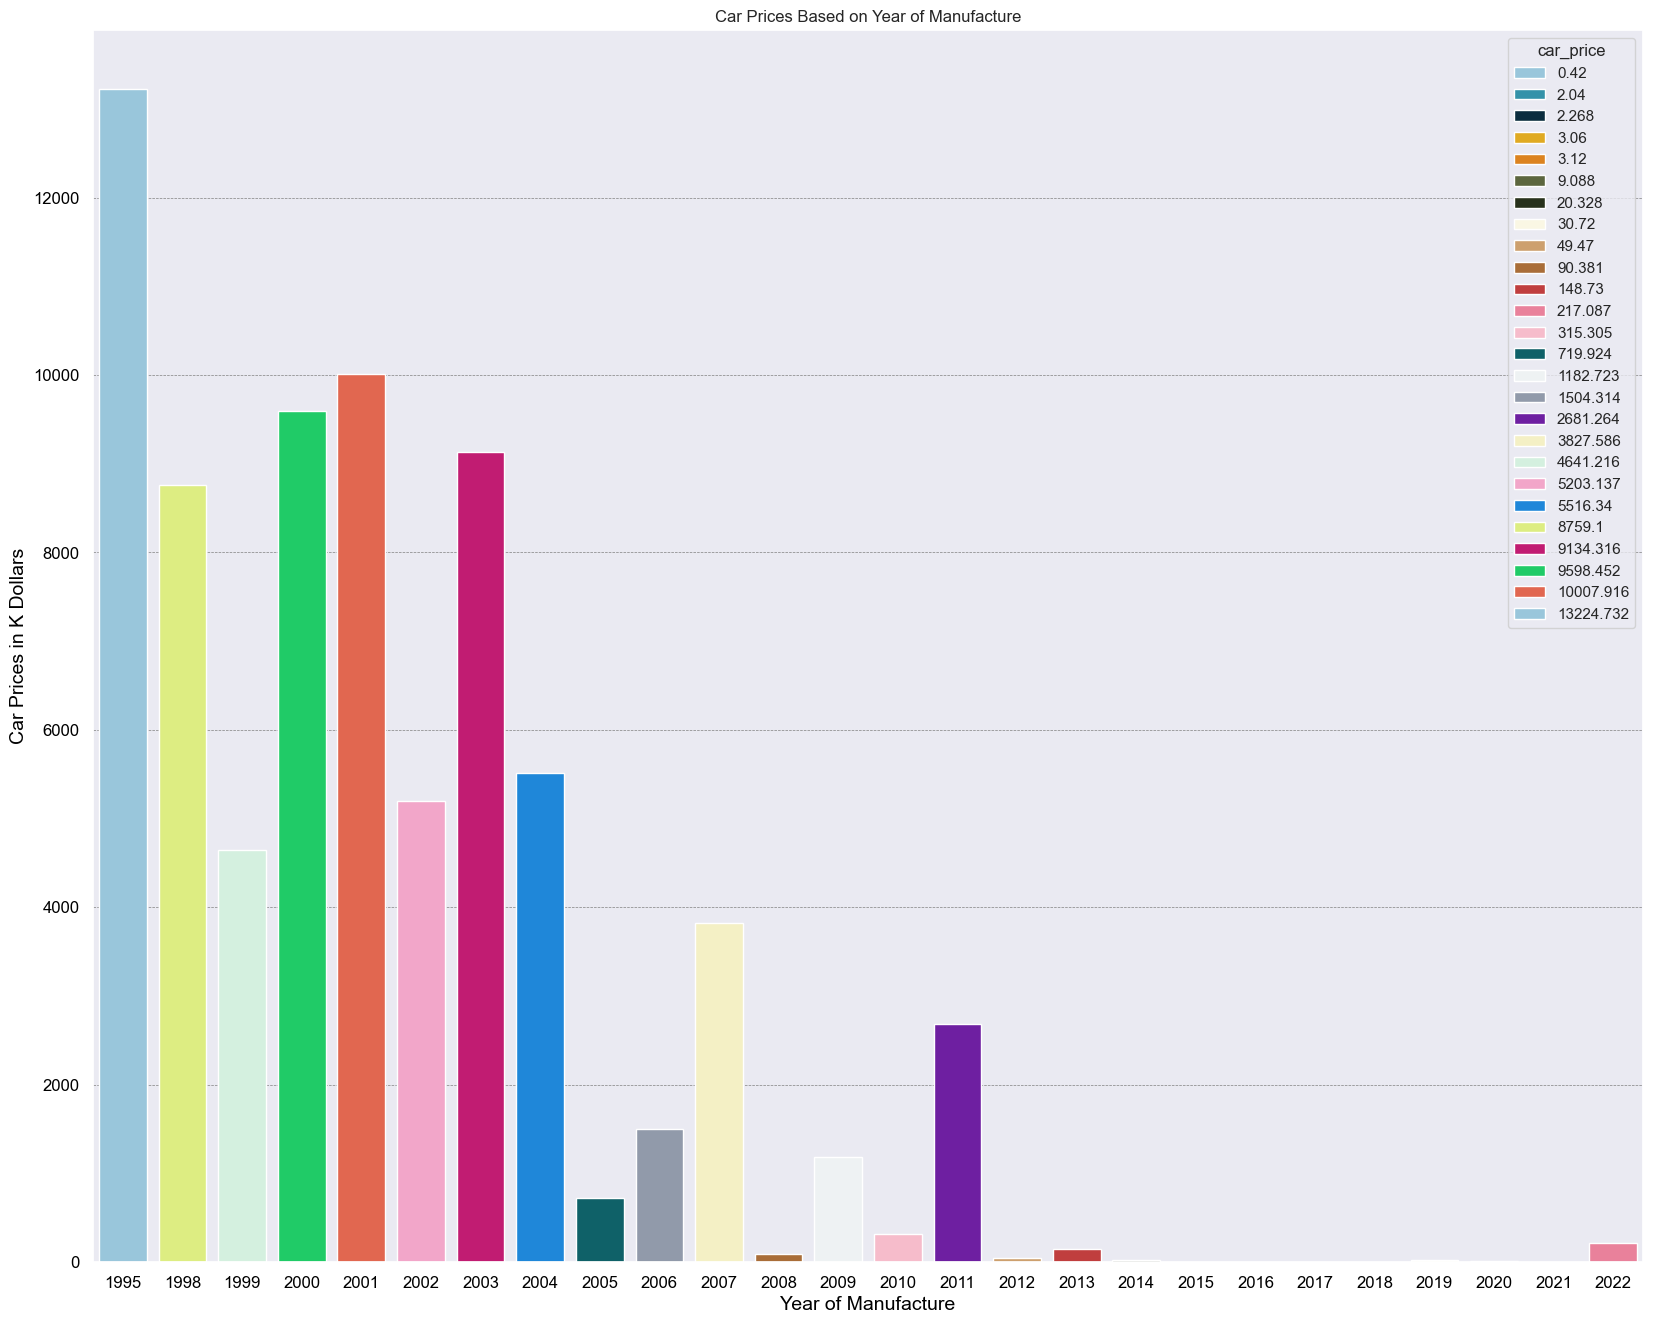

In [85]:
# Set plot size
sns.set(rc={'figure.figsize': (20,16)})

# Set labels and title
plt.xlabel("Year of Manufacture", fontsize=14, color='black')
plt.ylabel("Car Prices in K Dollars", fontsize=14, color='black')
plt.title('Car Prices Based on Year of Manufacture')

# Set ticks and grid
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Grouping dataset by year of manufacture and summing car prices
car_price_per_year = dataset.groupby('year_manufacture')['car_price'].sum().round(3)

# Transform year_label_encoded to original year values
years = dataset['year_manufacture'].map(label_encoded_to_year)
years =years.unique()

# Plot
sns.barplot(x=years, y=car_price_per_year, hue=car_price_per_year, palette=colors)
plt.show()


Visualize how car prices vary based on KMs driven

C:\Users\GMI\AppData\Local\Temp\ipykernel_17748\387080126.py:36: UserWarning: The palette list has more values (25) than needed (4), which may not be intended.
  sns.stripplot(x=kms_bins, y=dataset['car_price'], hue=kms_bins, dodge=True, size=8, alpha=0.7, jitter=True, palette=colors)


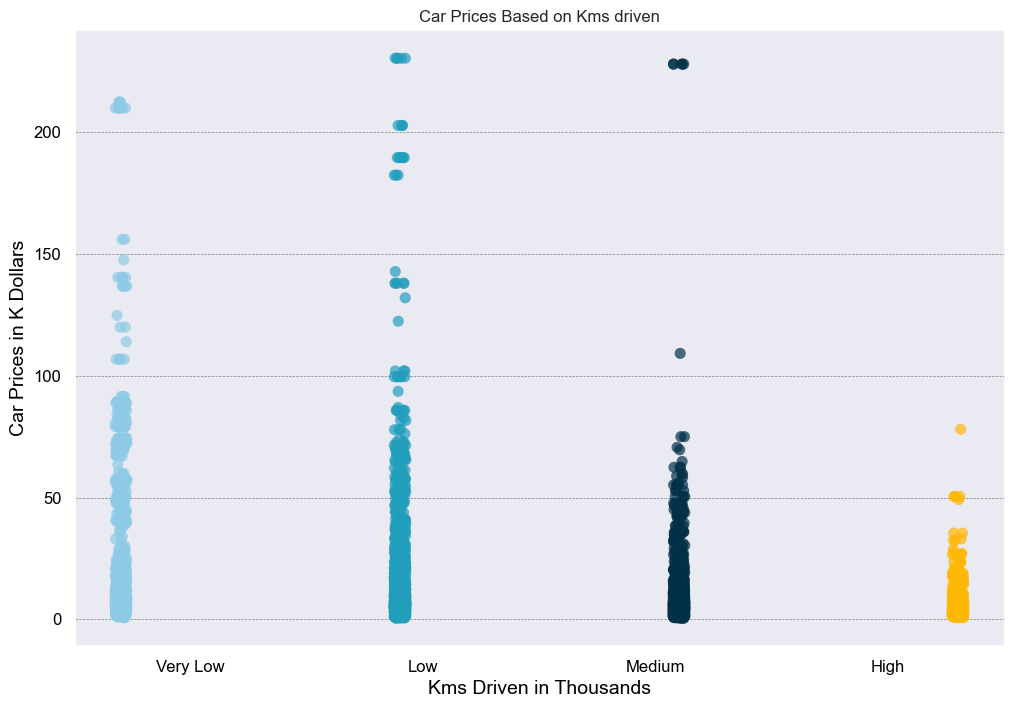

In [86]:
# Set plot size
sns.set(rc={'figure.figsize': (12,8)})

# Set labels and title
plt.xlabel("Kms Driven in Thousands", fontsize=14, color='black')
plt.ylabel("Car Prices in K Dollars", fontsize=14, color='black')
plt.title('Car Prices Based on Kms driven')

# Set ticks and grid
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Create Kms bins
# Define the statistics
mean_kms_driven = 63.211888
std_kms_driven = 41.844131
min_kms_driven = 0.25
max_kms_driven = 560

# Define bin edges
bin_edges = [min_kms_driven - std_kms_driven, 
             mean_kms_driven - std_kms_driven, 
             mean_kms_driven, 
             mean_kms_driven + std_kms_driven, 
             max_kms_driven + std_kms_driven,
             ]

# Define bin labels
bin_labels = ['Very Low', 'Low', 'Medium', 'High']

# Create bins using pandas cut function
kms_bins = pd.cut(dataset['kms_driven'], bins=bin_edges, labels=bin_labels)

# Plot 
sns.stripplot(x=kms_bins, y=dataset['car_price'], hue=kms_bins, dodge=True, size=8, alpha=0.7, jitter=True, palette=colors)
plt.show()

Visualize how car prices vary based on number of previous owners

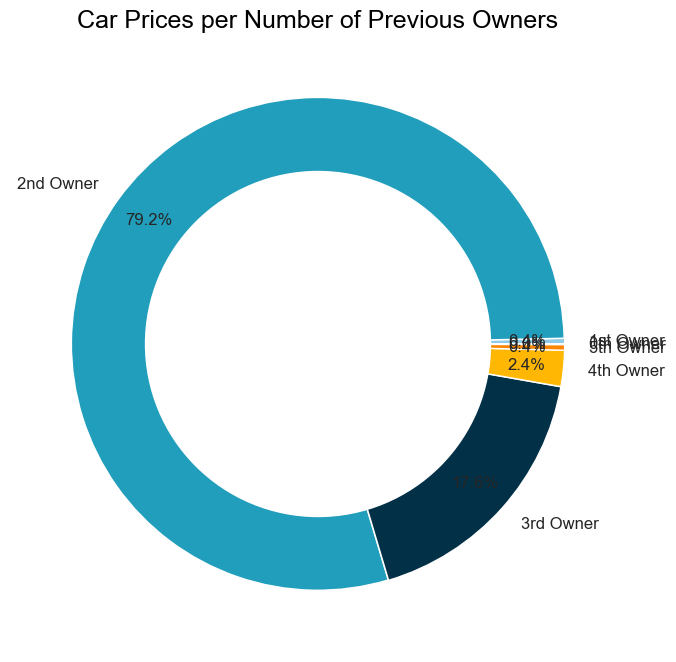

In [87]:
# Grouping dataset by num of owners and summing car prices
car_prices_per_ownership = dataset.groupby('ownership')['car_price'].sum().round(3)

# Transform num of previous owners encoded values to their original values
owners = dataset['ownership'].map(label_encoded_to_ownership)
owners = owners.unique()

# Calulate explode based on the number of owners
explode = (0.001,) * len(owners)

# Pie Chart
plt.pie(car_prices_per_ownership, colors=colors, labels=owners, autopct='%1.1f%%', pctdistance=0.85, explode=explode, textprops={'fontsize': 12})

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title
plt.title('Car Prices per Number of Previous Owners', fontsize=18, color='black')

# Display Chart
plt.show()

Visualize the 10 most expensive car names

C:\Users\GMI\AppData\Local\Temp\ipykernel_17748\3312303086.py:16: UserWarning: The palette list has more values (25) than needed (10), which may not be intended.
  sns.barplot(x=top_10_car_prices, y=top_10_car_prices_names, hue=top_10_car_prices_names, palette=colors)


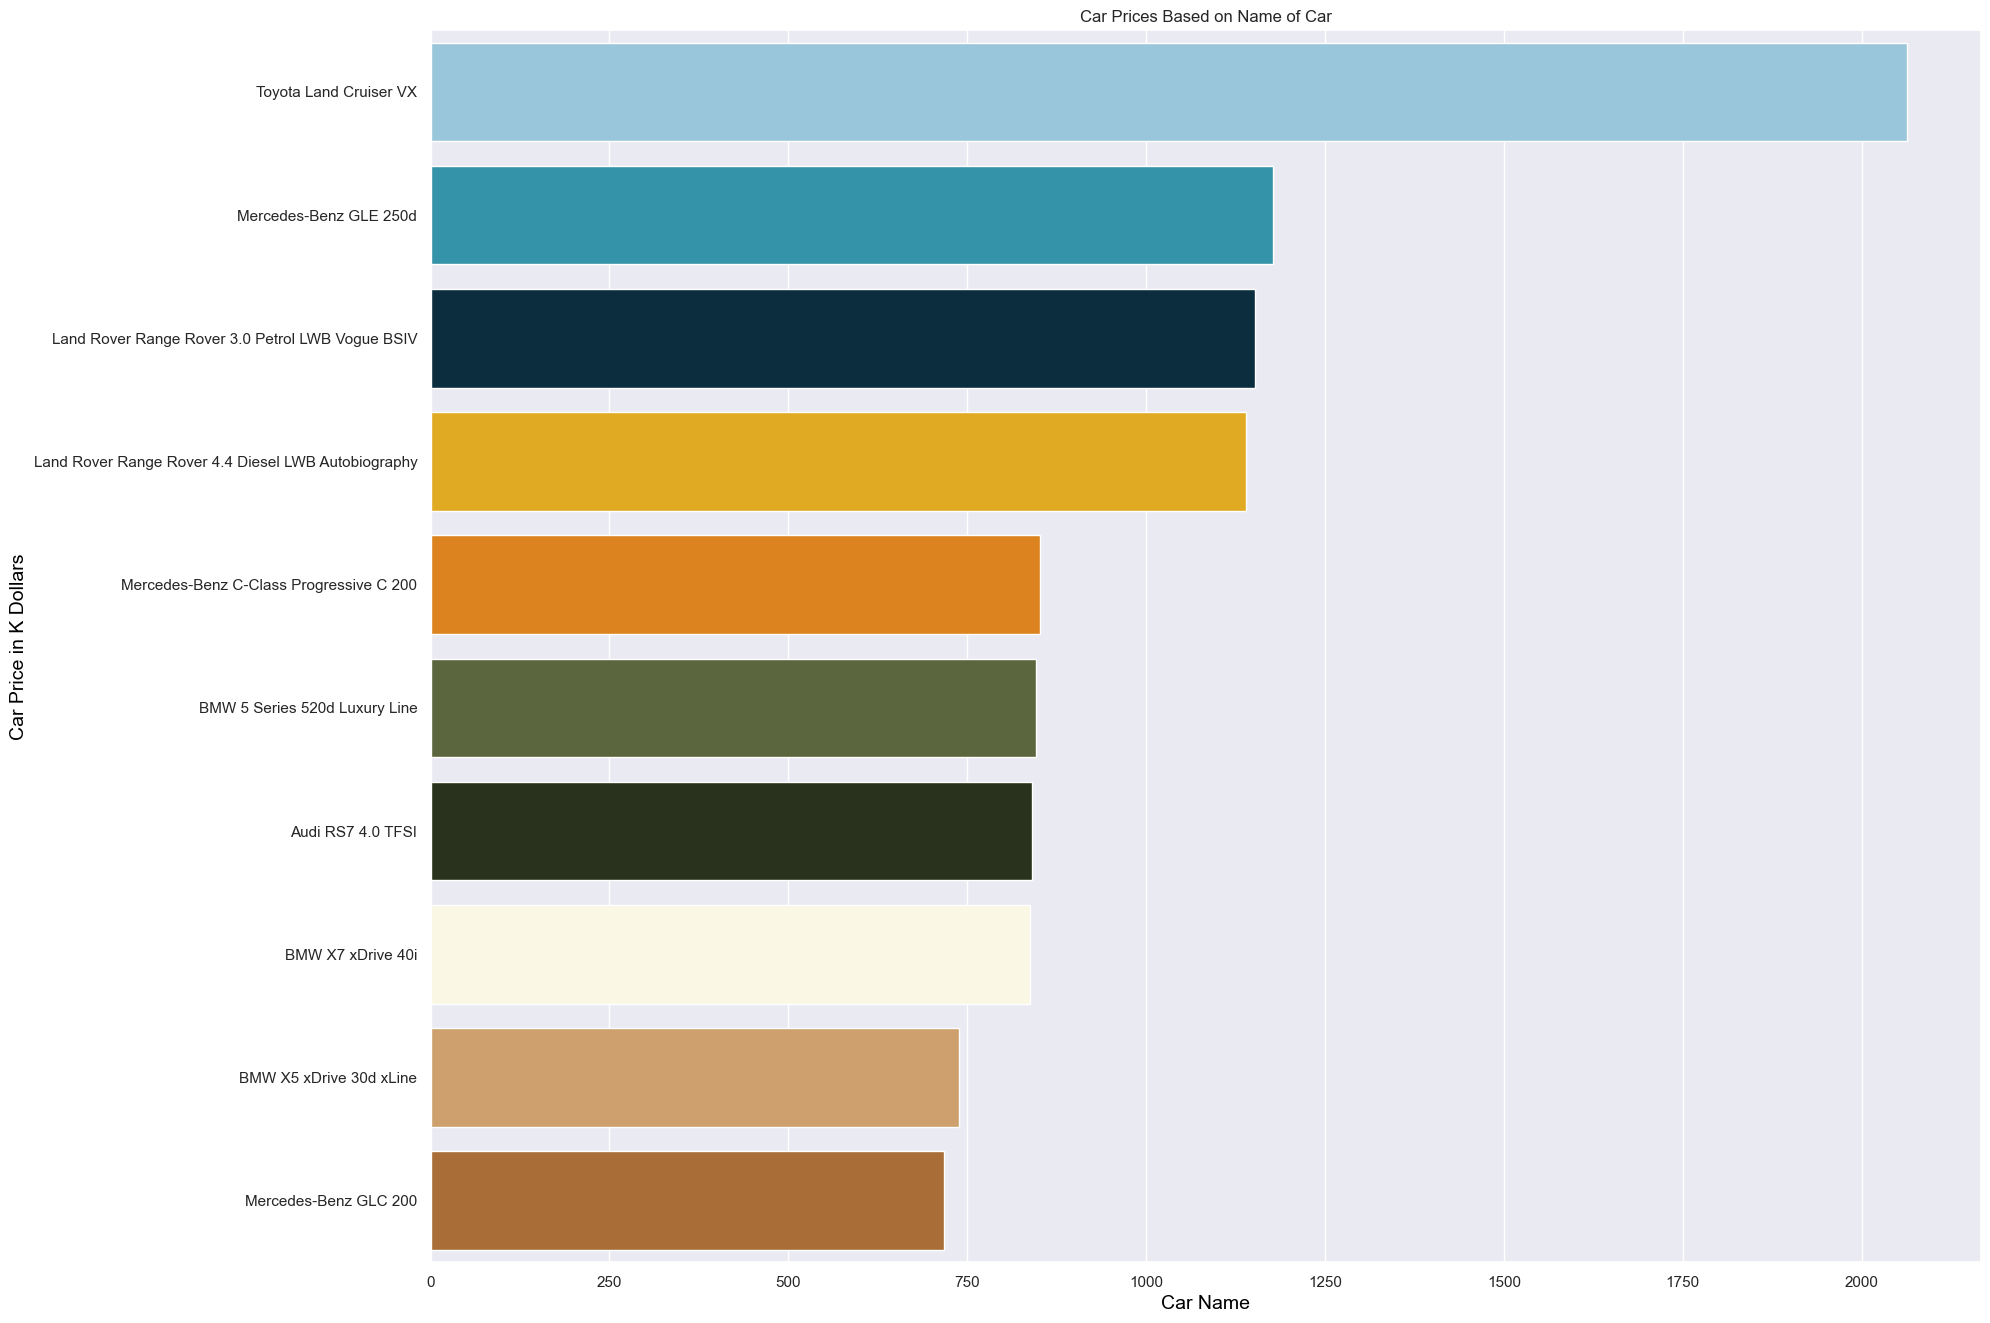

In [88]:
# Find the top 10 car names with the total highest price
car_prices_by_name = dataset.groupby('car_name')['car_price'].sum().round(3)
top_10_car_prices = car_prices_by_name.sort_values(ascending=False).head(10)
top_10_car_prices_names = top_10_car_prices.index
top_10_car_prices_names = [label_encoded_to_car_name[encoded] for encoded in top_10_car_prices_names]

# Set plot size
sns.set(rc={'figure.figsize': (20,16)})

# Set labels and title
plt.xlabel("Car Name", fontsize=14, color='black')
plt.ylabel("Car Price in K Dollars", fontsize=14, color='black')
plt.title('Car Prices Based on Name of Car')

# Plot
sns.barplot(x=top_10_car_prices, y=top_10_car_prices_names, hue=top_10_car_prices_names, palette=colors)
plt.show()

## Machine Learning Part

Split train and test datasets

In [18]:
# Shuffle the dataset
dataset = dataset.reindex(np.random.permutation(dataset.index))
dataset.head(10)

,index,car_name,year_manufacture,fuel_type,transmission,ownership,engine,number_seats,kms_driven,car_price
3412,3412,1548,14,4,1,2,40,2,61.090,6.132
365,365,488,18,4,1,2,12,2,89.680,5.640
4350,4350,901,20,1,1,1,56,2,86.418,6.648
1196,1196,1362,17,1,0,2,122,2,80.000,26.280
27,27,539,24,4,0,1,71,2,11.945,27.336
3890,3890,1672,15,1,1,1,2,2,120.000,3.660
3355,3355,116,19,1,1,2,74,2,40.000,5.760
3394,3394,513,3,4,1,1,16,2,147.000,0.780
4245,4245,14,24,4,0,1,61,2,16.000,50.160
4368,4368,8,21,4,0,2,40,2,27.000,39.360


In [19]:
x = dataset.drop(columns=['car_price'])
y = dataset['car_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Preprocessing Data : Normalization

In [20]:
# Keras input tensors of float values
inputs = {
    'car_name': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='car name'),
    'year_manufacture': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='year of manufacture'),
    'fuel_type': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='fuel type'),
    'transmission': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='transmission'),
    'ownership': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='ownership'),
    'engine': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='engine'),
    'number_seats': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number of seats'),
    'kms_driven': tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='kms driven')
}

Normalize car names values

In [21]:
car_name = tf.keras.layers.Normalization(
    name='normalization_car_name',
    axis=None
)
car_name.adapt(np.array(x_train['car_name']))
car_name = car_name(inputs['car_name'])

Normalize year of manufacture values

In [22]:
year_manufacture = tf.keras.layers.Normalization(
    name='normalization_year_manufacture',
    axis=None
)
year_manufacture.adapt(np.array(x_train['year_manufacture']))
year_manufacture = year_manufacture(inputs['year_manufacture'])

Normalize fuel type values

In [23]:
fuel_type = tf.keras.layers.Normalization(
    name='normalization_fuel_type',
    axis=None
)
fuel_type.adapt(np.array(x_train['fuel_type']))
fuel_type = fuel_type(inputs['fuel_type'])

Normalize transmission values

In [24]:
transmission = tf.keras.layers.Normalization(
    name='normalization_transmission',
    axis=None
)
transmission.adapt(np.array(x_train['transmission']))
transmission = transmission(inputs['transmission'])

Normalize ownership values

In [25]:
ownership = tf.keras.layers.Normalization(
    name='normalization_ownership',
    axis=None
)
ownership.adapt(np.array(x_train['ownership']))
ownership = ownership(inputs['ownership'])

Normalize engine types values

In [26]:
engine_type = tf.keras.layers.Normalization(
    name='normalization_engine',
    axis=None
)
engine_type.adapt(np.array(x_train['engine']))
engine_type = engine_type(inputs['engine'])

Normalize number of seats values

In [27]:
seats = tf.keras.layers.Normalization(
    name='normalization_seats',
    axis=None
)
seats.adapt(np.array(x_train['number_seats']))
seats = seats(inputs['number_seats'])

Normalize kms driven values

In [28]:
kms_driven = tf.keras.layers.Normalization(
    name='normalization_kms_driven',
    axis=None
)
kms_driven.adapt(np.array(x_train['kms_driven']))
kms_driven = kms_driven(inputs['kms_driven'])

Concatenate Inputs

In [29]:
# Concatenate our input into a single tensor
preprocessing_layers = tf.keras.layers.Concatenate()(
    [car_name, year_manufacture, fuel_type, transmission, ownership, engine_type, seats, kms_driven]
)

Normalize training label (car price)

In [30]:
car_price = tf.keras.layers.Normalization(axis=None)
car_price.adapt(np.array(y_train))

Normalize test label

In [31]:
car_price_test = tf.keras.layers.Normalization(axis=None)
car_price_test.adapt(np.array(y_test))

Define a Plot Function form plotting loss

In [38]:
def plot_loss_curve(epochs, training_loss, validation_loss):
    """Plot a curve of loss vs epoch."""
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.plot(epochs, training_loss, label="Training Loss")
    plt.plot(epochs, validation_loss, label="Validation Loss")

    # training_loss is a pandas Series so convert it to a list
    merged_loss_lists = training_loss.tolist() + validation_loss
    highest_loss = max(merged_loss_lists)
    lowest_loss = min(merged_loss_lists)
    top_of_y_axis = highest_loss * 1.03
    bottom_of_y_axis = lowest_loss * 0.97

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.legend()
    plt.show() 

Define a function to create the NN model

In [33]:
def create_model(inputs, outputs, learning_rate):
    """Create and compile a model"""
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Construct the layers into a model that Tensorflow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

Define a function to train the model

In [34]:
def train_model(model, x_train, y_train, epochs, batch_size, validation_split=0.1):
    """Feed a dataset into the model in order to train it"""
    features = {name: np.array(value) for name, value in x_train.items()}
    label = car_price(np.array(y_train))
    history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=validation_split)

    # Get model training details
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    loss = hist['mean_squared_error']

    return epochs, loss, history.history

Define model outputs

In [50]:
def get_outputs_dnn():
    # Create a Dense layer with 64 nodes
    dense_output = tf.keras.layers.Dense(units=40, activation='relu', name='hidden_dense_layer_1')(preprocessing_layers)
    # Create a Dense layer with 64 nodes
    dense_output = tf.keras.layers.Dense(units=24, activation='relu', name='hidden_dense_layer_2')(dense_output)
    # Create the Dense output layer
    dense_output = tf.keras.layers.Dense(units=1, name='dense_output')(dense_output)
    # Define an output dictionary we'll send to the model constructor
    outputs ={ 
        'dense_output': dense_output
    }
    return outputs

Build the model

In [59]:
# define hyperparameters
learning_rate = 0.01
epochs = 100
batch_size= 2000

# Split training dataset into a sub training set and a validation set
validation_split = 0.2

dnn_outputs = get_outputs_dnn()

# Establish the model topography
model = create_model(inputs, dnn_outputs, learning_rate=learning_rate)
model.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ car name            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year of manufacture │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fuel type           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ownership           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ engine (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ number of seats     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ kms driven          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_car_… │ (None, 1)         │          3 │ car name[0][0]    │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_year… │ (None, 1)         │          3 │ year of           │
│ (Normalization)     │                   │            │ manufacture[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_fuel… │ (None, 1)         │          3 │ fuel type[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_tran… │ (None, 1)         │          3 │ transmission[0][… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_owne… │ (None, 1)         │          3 │ ownership[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_engi… │ (None, 1)         │          3 │ engine[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_seats │ (None, 1)         │          3 │ number of         │
│ (Normalization)     │                   │            │ seats[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_kms_… │ (None, 1)         │          3 │ kms driven[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8)         │          0 │ normalization_ca… │
│ (Concatenate)       │                   │            │ normalization_ye

 Total params: 1,393 (5.47 KB)

 Trainable params: 1,369 (5.35 KB)

 Non-trainable params: 24 (128.00 B)

Train the model

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - loss: 1.0359 - mean_squared_error: 1.0496 - val_loss: 0.6140 - val_mean_squared_error: 0.6140
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.7786 - mean_squared_error: 0.7892 - val_loss: 0.5690 - val_mean_squared_error: 0.5690
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.7255 - mean_squared_error: 0.7328 - val_loss: 0.5569 - val_mean_squared_error: 0.5569
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.7029 - mean_squared_error: 0.7139 - val_loss: 0.5199 - val_mean_squared_error: 0.5199
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6551 - mean_squared_error: 0.6580 - val_loss: 0.4960 - val_mean_squared_error: 0.4960
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6181 - mean_squared_error: 0.6154 - val_loss: 0.4869 - val_mean_squared_error: 0.4869
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.6195 - mean_squared_error: 0.6223 - val_loss: 0.4731 - val_m

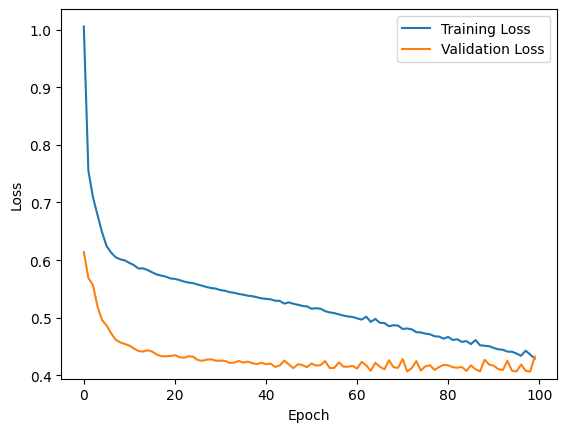

In [60]:
# Train the model on the normalized training set
epochs, mse, history = train_model(model, x_train, y_train, epochs, batch_size, validation_split)

# Plot the Loss curves
plot_loss_curve(epochs, mse, history['val_mean_squared_error'])

Evaluate the model

In [61]:
test_features = {name:np.array(value) for name, value in x_test.items()}
test_label = car_price_test(np.array(y_test))
print('\nEvaluate the new model against the test set:')
model.evaluate(x=test_features, y=test_label, batch_size=batch_size, return_dict=True)


Evaluate the new model against the test set:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5830 - mean_squared_error: 0.5830


{'loss': 0.5829710364341736, 'mean_squared_error': 0.5829710364341736}